# Module 6 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

**For this assignment only**

If you want to use NetworkX with your assignment, you can do:

```
conda install networkx
```
or

```
pip install networkx
```

Additionally, this assignment uses a recursive algorithm. You should use `deecopy` at the appropriate places to avoid entanglement issues.

## CSP: Map Coloring

In this programming assignment, you will be using your new understanding of **Constraint Satisfaction Problems** to color maps. As we know from the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem) any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors.

From the book, we know that we can translate this problem into a CSP where the map is represented as a [planar graph](http://en.wikipedia.org/wiki/Planar_graph) and the goal is to color all the nodes such that no adjacent nodes are colored the same color.

As with most AI problems, this requires us to figure out how best to represent the problem--and the solution--given the high and low level data structures and types at our disposal. For this problem, we'll settle on a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list.

Using this system, and adding a "coordinates" key with abstract drawing coordinates of each node for NetworkX, we can represent the counties of Connecticut like so:

In [3]:
connecticut = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut)

{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


The coordinates permit us to use NetworkX to draw the graph. We'll add a helper function for this, `draw_map`, which takes our planar_map, a figure size in abstract units, and a List of color assignments in the same order as the nodes in the planar_map.  The underlying drawings are made by matplotlib using NetworkX on top of it. Incidentally, the positions just make the map "work out" on NetworkX/matplotlib.

The size parameter is actually inches wide by inches tall (8, 10) is an 8x10 sheet of paper. Why doesn't a chart cover up the whole screen then? It's adjusted by dpi. On high resolution monitors, 300 dpi with 8x10 inches might only take up a fraction of that space. Use whatever you want to make the output look good. It doesn't matter for anything else but that.

A default value for `color_assignments` is provided, `None`, that simply colors all the nodes red. Otherwise, `color_assignments` must be a `List of Tuples` where each `Tuple` is a node name and assigned color. The order of `color_assignments` must be the same as the order of `"nodes"` in the `planar_map`.

**If you are using NetworkX in your assignment, you can copy this function into module03.py**

In [4]:
def draw_map(name, planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ['red' for c in range(0,len(planar_map[ "nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map[ "edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(name)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

Using this function, we can draw `connecticut`:

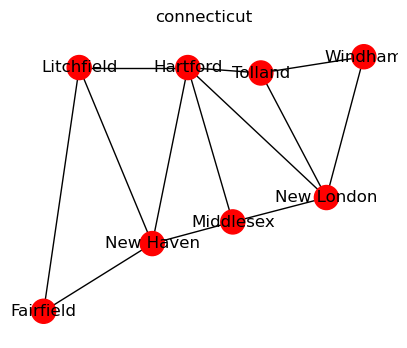

In [5]:
draw_map("connecticut", connecticut, (5,4), [(n, "red") for n in connecticut["nodes"]])

This coloring obviously has some problems! You're going to write a program to fix it.

So what we (and by "we", I mean "you") would like to do is write a program that can figure out how to color a planar map...ie, `connecticut` *and* `europe`, you will do it by implementing a function that uses the algorithms that were discussed in this module.

## Which CSP Algorithms?

You will need to implement **backtracking** and **forward checking**. You can roll your own from Depth First Search or use the pseudocode for `backtracking_search` on p. 192 of AIAMA 4th Edition.

You will also need to implement one of the following heuristics: **Minimum Remaining Values** or **Degree Heuristic** (tell me which one; it doesn't make sense to implement both) as well as **Least Constraining Value**. Break ties in ascending order (least to most).

You should get the backtracking and forward checking implemented first. Then add the heuristics. You can use the pseudocode in the book and then stub out the functions that implement the "pick a variable" heuristic and the "pick a value" heuristic. When you get it working, fill in the appropriate heuristic mentioned above.

Please change the "?" below into "yes" or "no" indicating which elements you were able to implement:

    backtracking: yes
    forward checking: yes
    minimum remaining values: yes
    degree heuristic: no
    least contraining value: yes

Your function should take the following form:

```python
def color_map( planar_map, color_list, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`. 

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement). For example, if your program starts to backtrack, the trace should say that it has to backtrack and why.

As usual, you should implement your function using helper functions, using one Markdown cell for documentation and one Codecell for implementation (one function and assertions).

-----

### <a id="check_completed_assignment"></a> check completed assignment

Formal Parameters:
**assignment**: A dictionary from nodes to colors

**returns** True or False

Returns True if all nodes have been assigned a color, False otherwise.

In [6]:
def check_completed_assignment(assignment):
    for k in assignment.keys():
        if assignment[k] == None:
            return False
    return True

In [7]:
uncompleted = {1:"blue",2:"blue",3:None}
assert(not check_completed_assignment(uncompleted))
completed = {1:"blue",2:"blue"}
empty = {}
assert(check_completed_assignment(completed))
assert(check_completed_assignment(empty))


### <a id="build_adjacency_list"></a> build adjacency list

Formal Parameters:
**planar_map**: The dictionary containing all nodes and edges

**var**  The particular node from which to build the adjacency list

**returns** adjacency_list: a list of nodes which share an edge with var

A helper function that finds all nodes adjacent to var. This function is used by [check_assignment_consistency](#check_assignment_consistency), [least_constraining_value_ordering](#least_constraining_value_ordering), and [least_constraining_value_ordering](#least_constraining_value_ordering)

In [8]:
def build_adjacency_list(planar_map,var):
    for i in range(len(planar_map["nodes"])):
        if planar_map["nodes"][i] == var:
            position = i
            break
    adjacency_list = []
    for e in planar_map["edges"]:
        if e[0] == position:
            adjacency_list.append(e[1])
        if e[1] == position:
            adjacency_list.append(e[0])
    return adjacency_list

In [9]:
pmap = {"nodes":["center","north","south","east","west"],"edges":[(0,1),(0,2),(3,0),(4,0)]}
v = "center"
v_list = build_adjacency_list(pmap,v)
assert(1 in v_list)
assert(2 in v_list)
assert(3 in v_list)
assert(4 in v_list)
assert(len(v_list)==4)
assert([0] == build_adjacency_list(pmap,"north"))
assert([0] == build_adjacency_list(pmap,"south"))
assert([0] == build_adjacency_list(pmap,"east"))
assert([0] == build_adjacency_list(pmap,"west"))

### <a id="check_assignment_consistency"></a> check_assignment_consistency

Formal Parameters:
**planar_map**: The dictionary containing all nodes and edges

**color_list** The list of colors

**assignment** A dictionary from nodes to colors

**var**  The particular node which is to be assigned a color

**color**  The particular color which is to be assigned to the node

**available_colorings**  A dictionary with keys: nodes, values: list of possible colors available to each node

**returns** True or False

Returns True if assigning **color** to **var** would be consistent, False otherwise.[backtrack](#backtrack)

In [10]:
def check_assignment_consistency(planar_map,color_list,assignment,var,color,available_colorings):
    if assignment == None:
        return False
    if not color in available_colorings[var]:
        return False
    position = None
    adjacency_list = build_adjacency_list(planar_map,var)
    for n in adjacency_list:
        if assignment[planar_map["nodes"][n]] == color:
            return False
    return True

In [11]:
pmap = {"nodes":["center","north","south","east","west"],"edges":[(0,1),(0,2),(3,0),(4,0)]}
available_colorings = {"center":["red"],"north":["red"],"south":["red"],"east":["red"],"west":["red"]}
color_list = ["red","blue"]
var = "center"
red = "red"
blue = "blue"
assignment = {"center":None,"north":"red","south":"red","east":"red","west":"red"}
assert(not check_assignment_consistency(pmap,color_list,assignment,var,red,available_colorings))
assert(not check_assignment_consistency(pmap,color_list,assignment,var,blue,available_colorings))
available_colorings = {"center":["red","blue"],"north":["red"],"south":["red"],"east":["red"],"west":["red"]}
assert(not check_assignment_consistency(pmap,color_list,assignment,var,red,available_colorings))
assert(check_assignment_consistency(pmap,color_list,assignment,var,blue,available_colorings))

### <a id="minimum_remaining_values"></a> minimum_remaining_values

Formal Parameters:
**planar_map**: The dictionary containing all nodes and edges

**assignment** A dictionary from nodes to colors

**available_colorings**  A dictionary with keys: nodes, values: list of possible colors available to each node

**returns** var_with_least_remaining_values: The unassigned node with least consistent color assignments available to it 

This heuristic chooses an unassigned variable with least remaining values, in order to reduce the branching factor in [backtrack](#backtrack).

In [12]:
def minimum_remaining_values(planar_map,assignment,available_colorings):
    least_remaining_values = float('inf')
    var_with_least_remaining_values = None
    for n in planar_map["nodes"]:
        if assignment[n] == None:
            curr = len(available_colorings[n])
            if curr<least_remaining_values:
                least_remaining_values = curr
                var_with_least_remaining_values = n
    return var_with_least_remaining_values

In [13]:
pmap = {"nodes":["center","north","south","east","west"],"edges":[(0,1),(0,2),(3,0),(4,0)]}
available_colorings = {"center":["red","blue"],"north":["red"],"south":["red"],"east":["red"],"west":["red"]}
assignment = {"center":None,"north":"red","south":"red","east":"red","west":"red"}
assert(minimum_remaining_values(pmap,assignment,available_colorings)=="center")
assignment = {"center":None,"north":None,"south":"red","east":"red","west":"red"}
assert(minimum_remaining_values(pmap,assignment,available_colorings)=="north")

### <a id="least_constraining_value_ordering"></a> least_constraining_value_ordering

Formal Parameters:
**planar_map**: The dictionary containing all nodes and edges

**assignment** A dictionary from nodes to colors

**available_colorings**  A dictionary with keys: nodes, values: list of possible colors available to each node

**var** The node that is currently being assigned a color in [backtrack](#backtrack).

**returns** color_order_list: a list of colors in order of least to most constraining on the other unassigned nodes

This heuristic chooses a color that will eliminate the minimum amount of consistent color assignments in unassigned nodes, in order to reduce the branching factor in [backtrack](#backtrack).

In [14]:
def least_constraining_value_ordering(planar_map,assignment,available_colorings,var):
    adjacency_list = build_adjacency_list(planar_map,var)
    color_constraint_map = {c:0 for c in available_colorings[var]}
    color_order_list = []
    for color in available_colorings[var]:
        for neighbor in adjacency_list:
            if assignment[planar_map["nodes"][neighbor]] == None and color in available_colorings[planar_map["nodes"][neighbor]]:
                color_constraint_map[color]+=1
        color_order_list = [color] + color_order_list
        i = 0
        while i < len(color_order_list)-1 and color_constraint_map[color_order_list[i]] > color_constraint_map[color_order_list[i+1]]:
            temp = color_order_list[i]
            color_order_list[i] = color_order_list[i+1]
            color_order_list[i+1] = temp
    return color_order_list
            
        
                

In [15]:
pmap = {"nodes":["center","north","south","east","west"],"edges":[(0,1),(0,2),(3,0),(4,0)]}
var = "center"
available_colorings = {"center":["red","blue"],"north":["red"],"south":["red"],"east":["red"],"west":["red"]}
assignment = {"center":None,"north":None,"south":None,"east":None,"west":None}
assert(least_constraining_value_ordering(pmap,assignment,available_colorings,var)==["blue","red"])
available_colorings = {"center":["red","blue"],"north":["red"],"south":["blue"],"east":["blue"],"west":["blue"]}
assert(least_constraining_value_ordering(pmap,assignment,available_colorings,var)==["red","blue"])

assignment2 = {"center":None,"north":"red","south":"red","east":"red","west":None}
available_colorings2 = {"center":["red","blue"],"north":["red"],"south":["red"],"east":["red"],"west":["blue"]}
assert(least_constraining_value_ordering(pmap,assignment2,available_colorings2,var)==["red","blue"])

var = "north"
available_colorings = {"center":["red"],"north":["red","blue","green"],"south":["blue","green"],"east":["blue","green"],"west":["blue","green"]}
assignment = {"center":None,"north":None,"south":None,"east":None,"west":None}
order = least_constraining_value_ordering(pmap,assignment,available_colorings,var)
assert(order[0] != "red")
assert(order[2] == "red")

### <a id="forward_checking"></a> forward_checking

Formal Parameters:
**planar_map**: The dictionary containing all nodes and edges

**assignment** A dictionary from nodes to colors

**available_colorings**  A dictionary with keys: nodes, values: list of possible colors available to each node

**var** The node that is currently being assigned a color in [backtrack](#backtrack).

**color** The color being assigned to the node

**returns** available_colorings2: a deep copy of **available_colorings**, with all nodes sharing an edge with **var** having their **color** removed from their list.

This helper function ensures that if the assignment of **color** to **var** prevents an unassigned node from being colored consistently, [backtrack](#backtrack) will not make any recursive calls on this assignment, in order to reduce the branching factor.  It also conveniently pops any inconsistent color assignments from **available_colorings**.

In [16]:
def forward_checking(planar_map,assignment,available_colorings,var,color):
    a_list = build_adjacency_list(planar_map,var)
    available_colorings2 = deepcopy(available_colorings)
    for node in a_list:
        if color in available_colorings2[planar_map["nodes"][node]]:
            available_colorings2[planar_map["nodes"][node]].remove(color)
    return available_colorings2

In [30]:
pmap = {"nodes":["center","north","south","east","west"],"edges":[(0,1),(0,2),(3,0),(4,0)]}
center = "center"
available_colorings = {"center":["red","blue"],"north":["red"],"south":["red"],"east":["red"],"west":["red"]}
red = "red"
blue = "blue"
assignment = {"center":None,"north":None,"south":None,"east":None,"west":None}
assert(forward_checking(pmap,assignment,available_colorings,center,red)=={"center":["red","blue"],"north":[],"south":[],"east":[],"west":[]})
assert(available_colorings == {"center":["red","blue"],"north":["red"],"south":["red"],"east":["red"],"west":["red"]})
assert(forward_checking(pmap,assignment,available_colorings,center,blue) == available_colorings)

### <a id="backtrack"></a> backtrack

Formal Parameters:
**planar_map**: The dictionary containing all nodes and edges

**assignment** A dictionary with keys: nodes, values: the color assigned to that key

**available_colorings**  A dictionary with keys: nodes, values: list of possible colors available to each node

**color_list** The list of colors to choose from

**trace** A boolean that determines whether to print the statements about what backtrack is doing

**returns** None, if the map can't be colored, or result: a dictionary with keys: names of nodes, values: the colors assigned to the keys.

This function is the main algorithm of CSP.  It starts by making deep copies of all the important variables, then picks a node to assign a color to based on the [minimum remaining values](#minimum_remaining_values) heuristic, then a color to assign based on the [least constraining value](#least_constraining_value_ordering).  It then [checks the consistency](#check_assignment_consistency) of that assignment, assigns the color and [forward checks](#forward_checking) to ensure that all nodes can still be colored.  If so, backtrack is called recursively with that assignment.  If not, the color with next [least constraining value](#least_constraining_value_ordering).  If no color can be chosen, it returns None.

In [18]:
def backtrack(planar_map,color_list,assignment,available_colorings, trace = False):
    if check_completed_assignment(assignment):
        return assignment
    planar_map2 = deepcopy(planar_map)
    available_colorings2 = deepcopy(available_colorings)
    assignment2 = deepcopy(assignment)
    if trace:
        print("Picking the city with minimum remaining values.")
    var = minimum_remaining_values(planar_map2,assignment2,available_colorings2)
    if trace:
        print("Ordering the colors by least constraining value.")
    color_order_list = least_constraining_value_ordering(planar_map2,assignment2,available_colorings2,var)
    for color in color_order_list:
        if trace:
            print("Checking consistency of assignment of " + color + " to "+ var+".")
        if check_assignment_consistency(planar_map2,color_list,assignment2,var,color,available_colorings2):
            if trace:
                print("Assigning " + color + " to "+ var+".")
            assignment2[var] = color
            if trace:
                print("Forward checking.")
            inferences = forward_checking(planar_map2,assignment2,available_colorings2,var,color)
            if check_assignment_consistency(planar_map2,color_list,assignment2,var,color,inferences):
                if trace:
                    print("Recursive backtracking.")
                result = backtrack(planar_map2,color_list,assignment2,inferences,trace)
                if trace:
                    print("Checking consistency.")
                if check_assignment_consistency(planar_map2,color_list,result,var,color,inferences):
                    if trace:
                        print("Returning.")
                    return result
    if trace:
        print("The assignment "+ str(assignment2) +" was inconsistent.")
    return None

In [34]:
pmap = {"nodes":["center","north","south","east","west"],"edges":[(0,1),(0,2),(3,0),(4,0)]}
color_list1 = ["red","blue"]
assignment = {n:None for n in pmap["nodes"]}
available_colorings = {n:[c for c in color_list1] for n in pmap["nodes"]}
colored = backtrack(pmap,color_list1,assignment,available_colorings)
assert(colored == {"center":"red","north":"blue","south":"blue","east":"blue","west":"blue"} or colored =={"center":"blue","north":"red","south":"red","east":"red","west":"red"})
color_list2 = ["red"]
available_colorings = {n:[c for c in color_list2] for n in pmap["nodes"]}
assert(None== backtrack(pmap,color_list2,assignment,available_colorings))

### <a id="color_map"></a> color_map

Formal Parameters:
**planar_map**: The dictionary containing all nodes and edges

**color_list** The list of colors to choose from

**trace** A boolean that determines whether to print the statements about what backtrack is doing

**returns** None, if the map can't be colored, or name_color_pairs_list: a list of pairs (node number, color)

This function is the set up function of CSP.  It starts by making the initial dictionaries of color assignments and available colorings.  It then calls [backtrack](#backtrack) and converts the dictionary returned into the proper form.

In [19]:
def color_map(planar_map, color_list, trace=False):
    assignment = {n:None for n in planar_map["nodes"]}
    available_colorings = {n:[c for c in color_list] for n in planar_map["nodes"]}
    name_color_dict = backtrack(planar_map,color_list,assignment, available_colorings,trace)
    if name_color_dict == None:
        if trace:
            print("This map cannot be colored with "+ str(len(color_list)) +" color(s).  Try using 4.")
        return None
    name_color_pairs_list = [(n,name_color_dict[n]) for n in planar_map["nodes"]]
    return name_color_pairs_list

In [42]:
pmap = {"nodes":["center","north","south","east","west"],"edges":[(0,1),(0,2),(3,0),(4,0)]}
color_list1 = ["red","blue"]
colored = color_map(pmap,color_list1)
assert(colored == [("center","red"),("north","blue"),("south","blue"),("east","blue"),("west","blue")] or colored ==[("center","blue"),("north","red"),("south","red"),("east","red"),("west","red")])
color_list2 = ["red"]
assert(None== color_map(pmap,color_list2))

Currently, it just colors everything red. When you are done, if it cannot find a coloring, it should return `None`.

## Problem 1. Color Connecticut Using Your Solution

In [20]:
connecticut_colors = color_map(connecticut, ["red", "blue", "green", "yellow"], trace=True)

Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of yellow to Fairfield.
Assigning yellow to Fairfield.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of green to Litchfield.
Assigning green to Litchfield.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of blue to New Haven.
Assigning blue to New Haven.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of yellow to Hartford.
Assigning yellow to Hartford.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining 

Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

In [21]:
edges = connecticut["edges"]
nodes = connecticut[ "nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

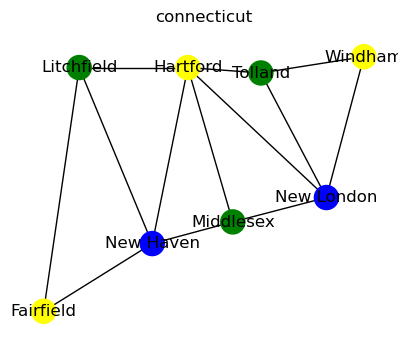

In [22]:
draw_map("connecticut", connecticut, (5,4), connecticut_colors)

Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of green to Fairfield.
Assigning green to Fairfield.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of blue to Litchfield.
Assigning blue to Litchfield.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of red to New Haven.
Assigning red to New Haven.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of green to Hartford.
Assigning green to Hartford.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
C

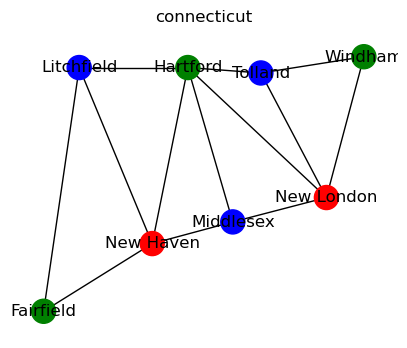

In [23]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=True)
if connecticut_colors:
    draw_map("connecticut", connecticut, (5,4), connecticut_colors)

## Problem 2. Color Europe Using Your solution

In [24]:
europe = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [25]:
europe_colors = color_map(europe, ["red", "blue", "green", "yellow"], trace=True)

Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of yellow to Iceland.
Assigning yellow to Iceland.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of green to Ireland.
Assigning green to Ireland.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of blue to United Kingdom.
Assigning blue to United Kingdom.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of yellow to France.
Assigning yellow to France.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining valu

Here we're testing to see if the adjacent nodes are colored differently:

In [26]:
edges = europe["edges"]
nodes = europe[ "nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

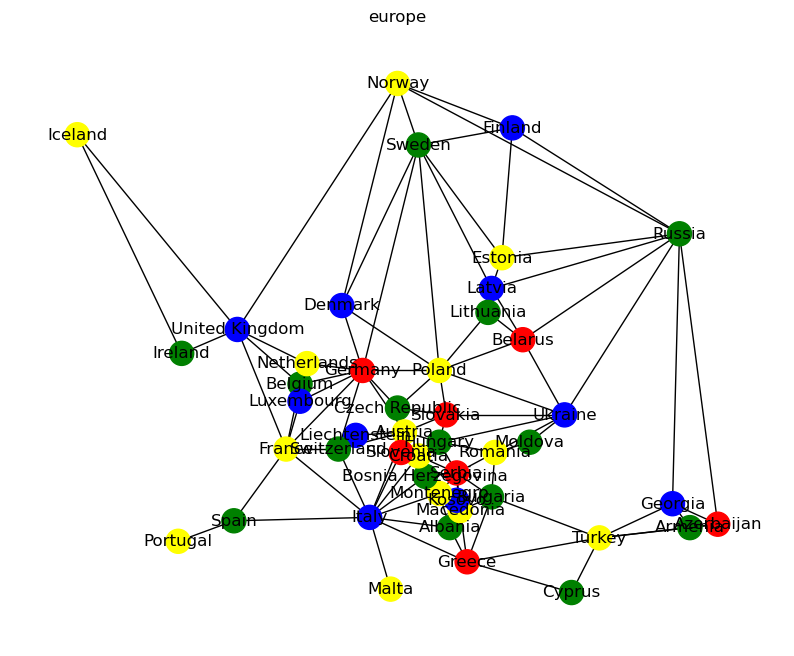

In [27]:
draw_map("europe", europe, (10,8), europe_colors)

In [28]:
europe_colors = color_map(europe, ["red", "blue", "green"], trace=True)
if europe_colors:
     draw_map("europe", europe, (10,8), europe_colors)

Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of green to Iceland.
Assigning green to Iceland.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of blue to Ireland.
Assigning blue to Ireland.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of red to United Kingdom.
Assigning red to United Kingdom.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Checking consistency of assignment of green to France.
Assigning green to France.
Forward checking.
Recursive backtracking.
Picking the city with minimum remaining values.
Ordering the colors by least constraining value.
Check

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.